## **PCA en Personality dataset**

#### Manuel Sánchez-Montañés

In [1]:
COLAB = True

First we import the libraries we will need. In addition we will use the first code cell to activate the *inline* mode for the graphics generated by *matplotlib*. We also initialize the seed of the random generator.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Load**

Data obtained from:
http://www.stanford.edu/class/psych253/data/personality0.txt

Now we load this database:

In [3]:
if COLAB:
  !mkdir datasets
  aux = "'https://docs.google.com/uc?export=download&id=1rm7V_wwKnGLevd0PFhbEUhafkBRP42u8&confirm=t'"
  !wget $aux -O ./datasets/personality0.txt

data = pd.read_csv('datasets/personality0.txt', delimiter=' ', header=0)
print('\033[1m' + 'Personality Database\n', '\033[0m')
print('First 5 instances:')
data.head()

--2023-11-03 16:32:26--  https://docs.google.com/uc?export=download&id=1rm7V_wwKnGLevd0PFhbEUhafkBRP42u8&confirm=t
Resolving docs.google.com (docs.google.com)... 108.177.111.100, 108.177.111.101, 108.177.111.102, ...
Connecting to docs.google.com (docs.google.com)|108.177.111.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tqjo3cje5vbje170008t2i3iep9sdkp1/1699029075000/17112108692206476645/*/1rm7V_wwKnGLevd0PFhbEUhafkBRP42u8?e=download&uuid=d53188bc-1a67-41fe-80b6-f9b02331bf38 [following]
--2023-11-03 16:32:27--  https://doc-0c-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tqjo3cje5vbje170008t2i3iep9sdkp1/1699029075000/17112108692206476645/*/1rm7V_wwKnGLevd0PFhbEUhafkBRP42u8?e=download&uuid=d53188bc-1a67-41fe-80b6-f9b02331bf38
Resolving doc-0c-8k-docs.googleusercontent.com (doc-0c-8k-docs.googleusercontent.com)... 173.194.74.1

,distant,talkatv,carelss,hardwrk,anxious,agreebl,tense,kind,opposng,relaxed,...,lazy,coopera,quiet,organiz,criticl,lax,laidbck,withdrw,givinup,easygon
1,2,7,1,4,7,8,5,9,5,6,...,7,9,9,5,5,5,7,5,5,8
2,3,8,2,7,5,8,4,8,5,7,...,2,7,6,6,4,3,7,2,2,7
3,6,6,2,5,1,8,2,9,2,8,...,5,8,7,4,5,5,7,6,2,8
4,3,7,6,7,8,8,2,8,3,7,...,3,8,4,7,6,6,6,4,3,7
5,7,3,3,5,8,6,7,2,3,3,...,6,6,7,5,5,3,3,7,5,5


## **Data Description**

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.describe()

,distant,talkatv,carelss,hardwrk,anxious,agreebl,tense,kind,opposng,relaxed,...,lazy,coopera,quiet,organiz,criticl,lax,laidbck,withdrw,givinup,easygon
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,3.866667,5.883333,3.412500,6.925000,5.129167,6.629167,4.616667,6.970833,3.858333,5.475000,...,4.179167,6.695833,4.604167,6.154167,5.170833,4.083333,5.245833,3.754167,2.675000,6.066667
std,1.794615,1.677732,1.811357,1.370108,1.880305,1.372162,1.904337,1.262255,1.599141,1.694009,...,1.893941,1.197619,1.880750,1.963363,1.745282,1.664713,1.790837,1.769684,1.553307,1.601429
min,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,5.000000,2.000000,6.000000,4.000000,6.000000,3.000000,6.000000,3.000000,4.000000,...,3.000000,6.000000,3.000000,5.000000,4.000000,3.000000,4.000000,2.000000,1.750000,5.000000
50%,3.000000,6.000000,3.000000,7.000000,5.000000,7.000000,5.000000,7.000000,4.000000,5.000000,...,4.000000,7.000000,5.000000,6.000000,5.000000,4.000000,5.000000,3.000000,2.000000,6.000000
75%,5.000000,7.000000,5.000000,8.000000,7.000000,8.000000,6.000000,8.000000,5.000000,7.000000,...,5.000000,7.000000,6.000000,8.000000,6.000000,5.000000,7.000000,5.000000,4.000000,7.000000
max,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,7.000000,8.000000,9.000000


## **Data Exploration**

In [6]:
attribute_names = list(data.columns)
X = data[attribute_names].values
print(attribute_names)

['distant', 'talkatv', 'carelss', 'hardwrk', 'anxious', 'agreebl', 'tense', 'kind', 'opposng', 'relaxed', 'disorgn', 'outgoin', 'approvn', 'shy', 'discipl', 'harsh', 'persevr', 'friendl', 'worryin', 'respnsi', 'contrar', 'sociabl', 'lazy', 'coopera', 'quiet', 'organiz', 'criticl', 'lax', 'laidbck', 'withdrw', 'givinup', 'easygon']


In [7]:
[X.min(), X.max()]

[1, 9]

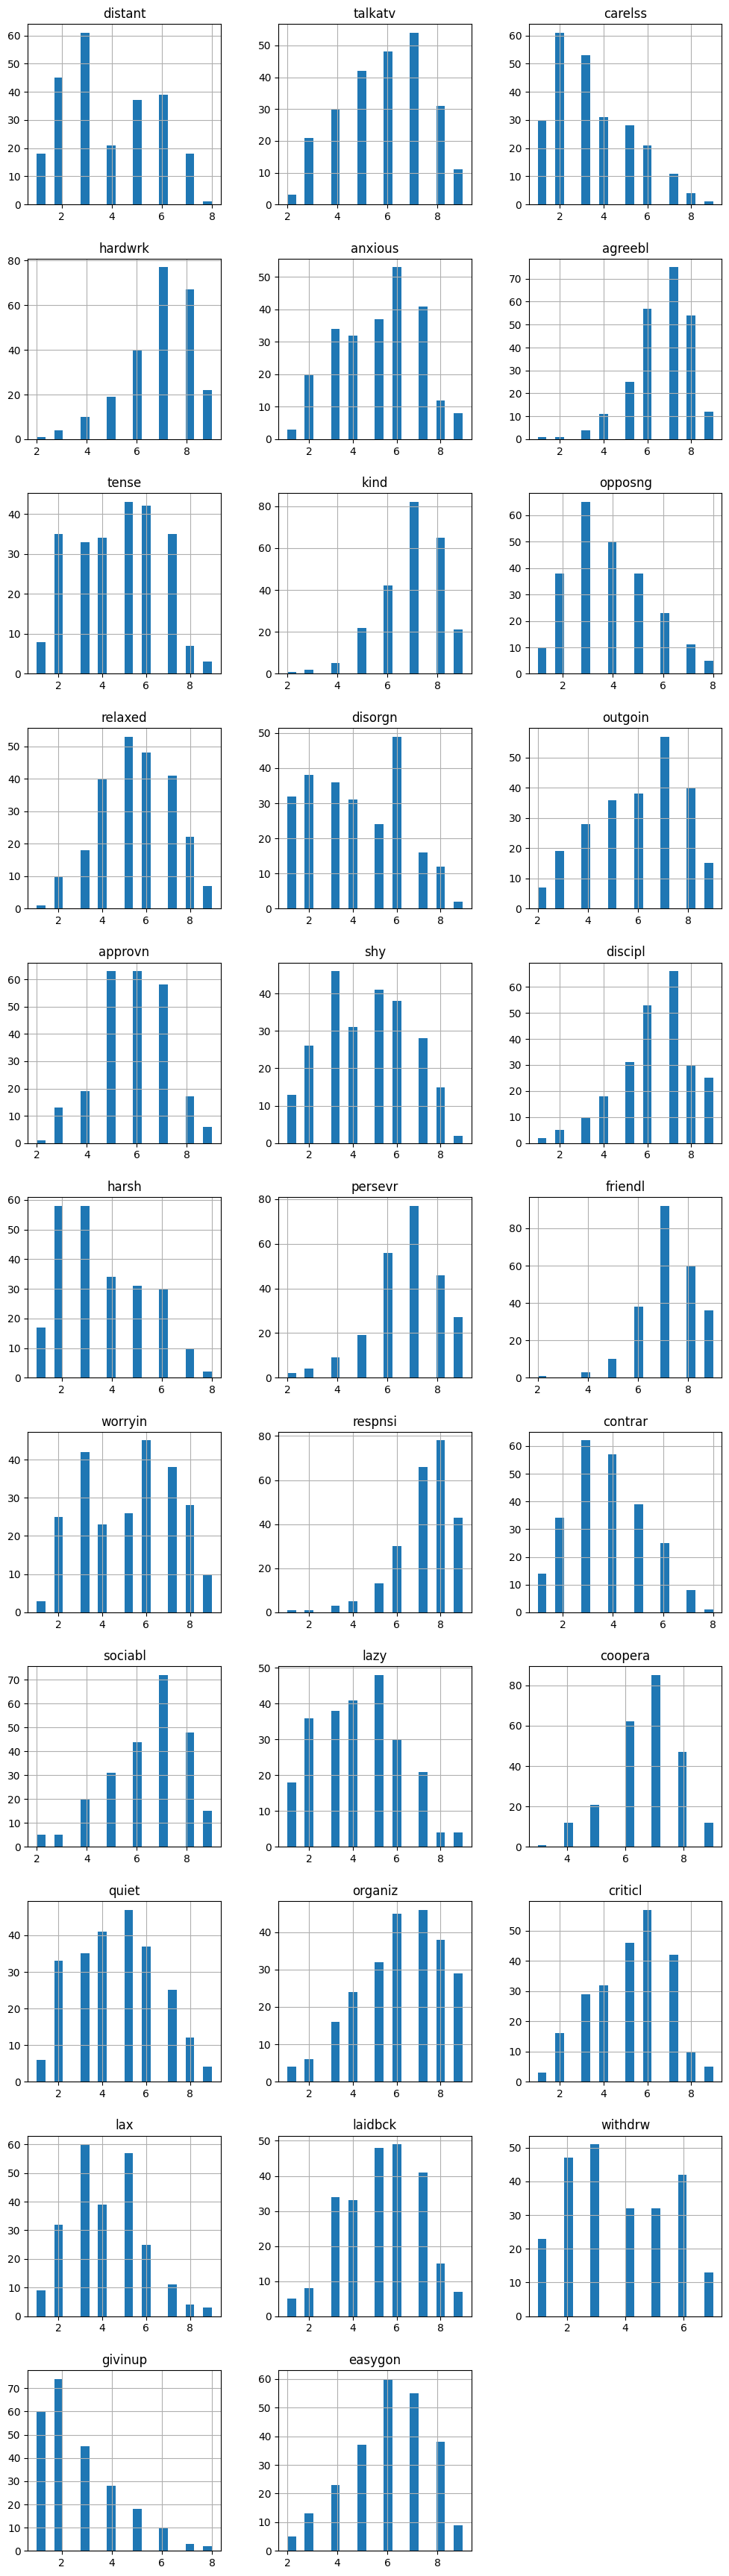

In [8]:
data.hist(bins=20, figsize=(12,44), layout=(11,3));

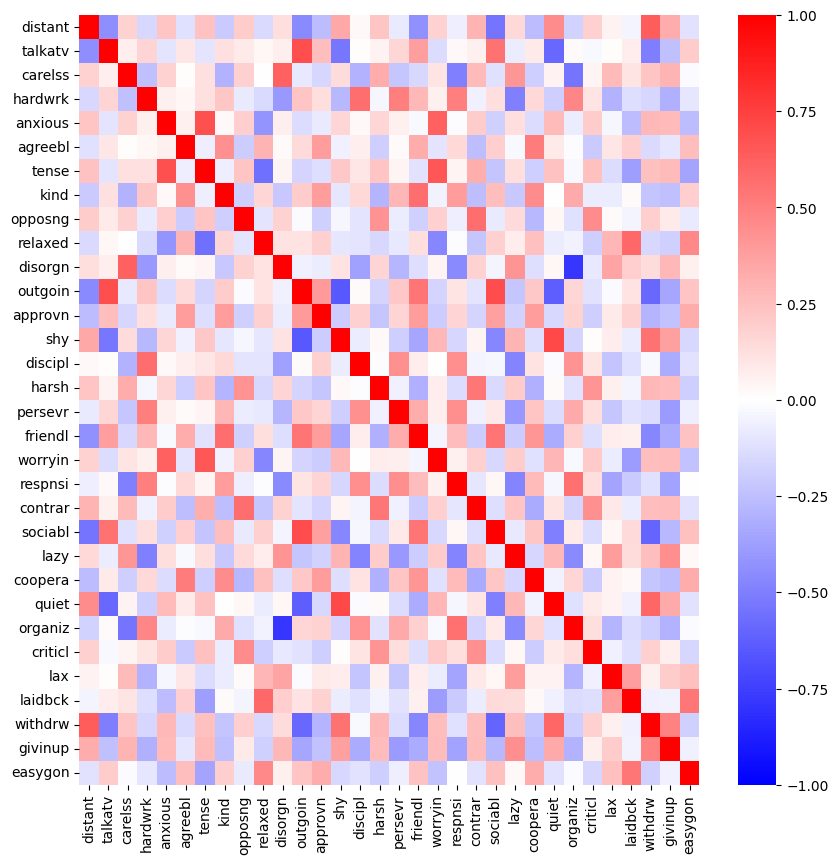

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="bwr", vmin=-1, vmax=1);

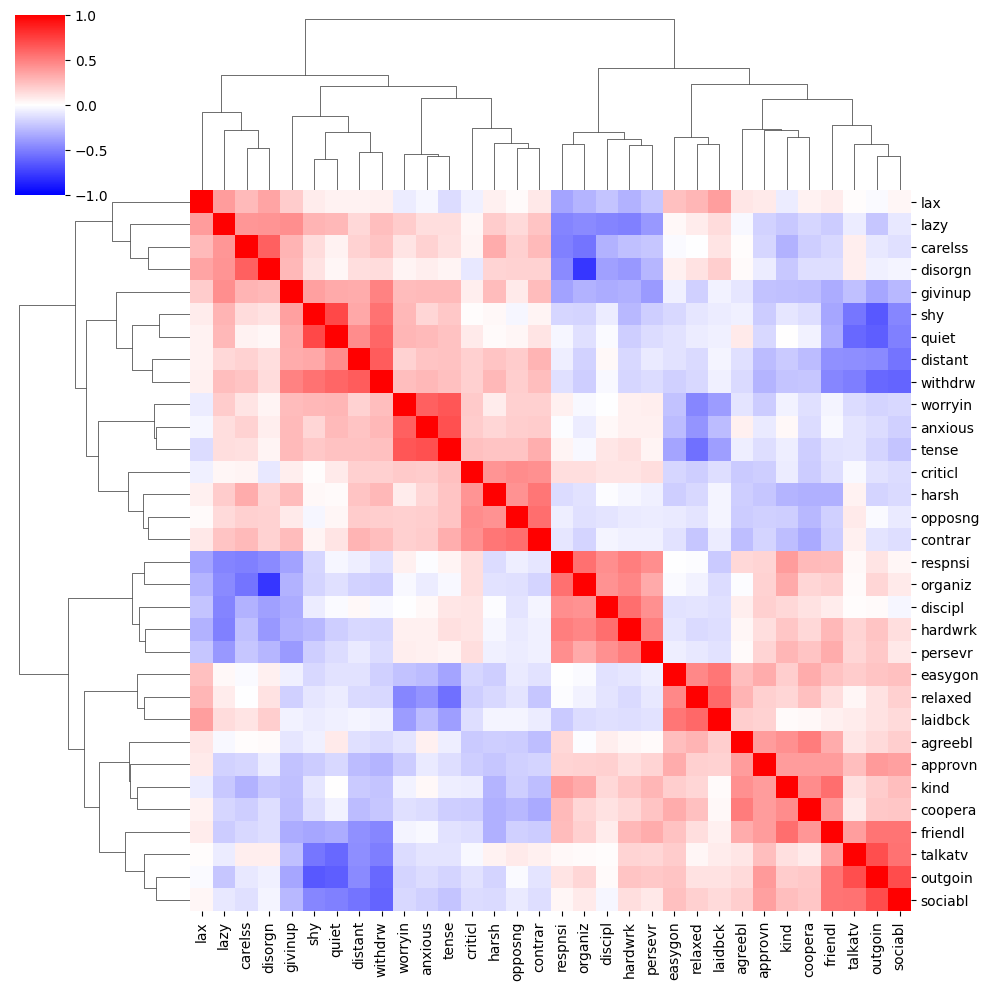

In [10]:
sns.clustermap(data.corr(), cmap="bwr", vmin=-1, vmax=1);

# **PCA**

After loading the database we need to do some basic preprocessing: standarization and PCA:

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_std)

print()
print('-- Estadísticas de los datos proyectados en las componentes principales --')
print()
#pd.DataFrame(X_pca).describe()

for i in range(X_pca.shape[1]):
    print("* Datos en componente principal", i+1, ":")
    print("  - Media    :", X_pca[:,i].mean().round(3))
    print("  - Varianza :", X_pca[:,i].var(ddof=1).round(3))
    print("  - Autovalor:", pca.explained_variance_[i].round(3))
    print("  - Varianza explicada:", (100*pca.explained_variance_ratio_[i]).round(3), "%")
    print()

# IMPORTANT: note that we have used all the patterns in the dataset
# to fit the parameters of StandardScaler and PCA
# This is ONLY ok if we are NOT going to develop a predictive model
# for "y" using this data (in that case, we would use both training and test
# data for fitting the parameters, and using test data for fitting is forbidden!)
#
# If we were going to develop a model for predicting the value
# of a target variable "y" (classification / regression problem),
# first we would need to split the dataset in training and test sets:
#
# testsize = 0.2
# Xaux_train, Xaux_test, y_train, y_test = train_test_split(Xaux, y, test_size=testsize)
#
# and both the normalization and PCA should be fitted using only the training set:
#
# std_scaler = StandardScaler()
# std_scaler.fit(Xaux_train)
# X_std_train = std_scaler.transform(Xaux_train)
# pca = PCA(n_components=2)
# pca.fit(X_std_train)
# X_train = pca.transform(X_std_train)
#
# X_std_test = std_scaler.transform(Xaux_test)
# X_test = pca.transform(X_std_test)



-- Estadísticas de los datos proyectados en las componentes principales --

* Datos en componente principal 1 :
  - Media    : -0.0
  - Varianza : 7.271
  - Autovalor: 7.271
  - Varianza explicada: 22.627 %

* Datos en componente principal 2 :
  - Media    : 0.0
  - Varianza : 4.544
  - Autovalor: 4.544
  - Varianza explicada: 14.141 %

* Datos en componente principal 3 :
  - Media    : 0.0
  - Varianza : 3.137
  - Autovalor: 3.137
  - Varianza explicada: 9.763 %

* Datos en componente principal 4 :
  - Media    : 0.0
  - Varianza : 2.343
  - Autovalor: 2.343
  - Varianza explicada: 7.292 %

* Datos en componente principal 5 :
  - Media    : 0.0
  - Varianza : 1.886
  - Autovalor: 1.886
  - Varianza explicada: 5.87 %

* Datos en componente principal 6 :
  - Media    : 0.0
  - Varianza : 1.199
  - Autovalor: 1.199
  - Varianza explicada: 3.731 %

* Datos en componente principal 7 :
  - Media    : 0.0
  - Varianza : 0.931
  - Autovalor: 0.931
  - Varianza explicada: 2.896 %

* Datos en 

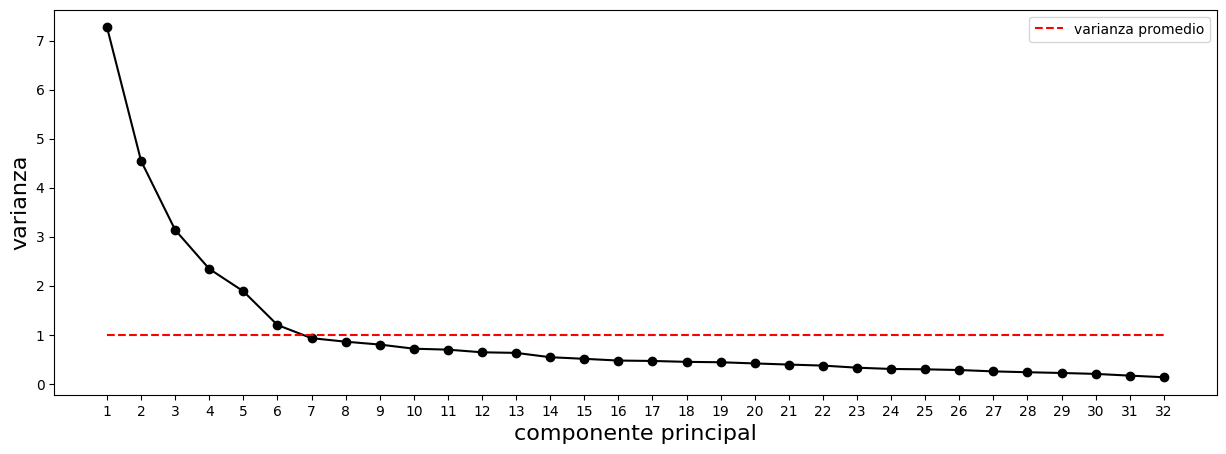

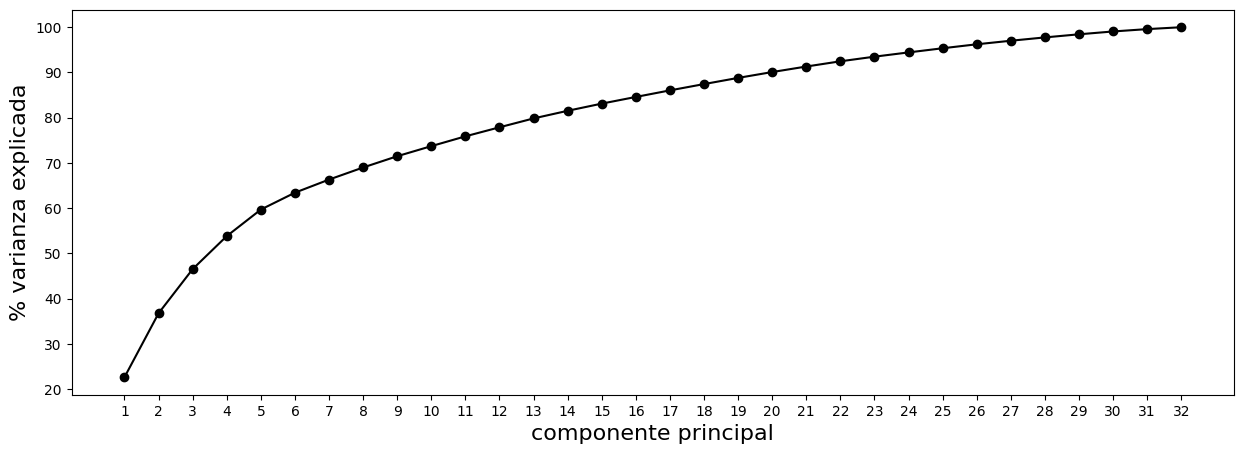

In [12]:
plt.figure(figsize=(15,5))
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_, '-ok')
plt.plot([1,pca.n_components_], [1,1], '--r', label='varianza promedio')
plt.legend()
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('varianza', fontsize=16)
plt.xticks(range(1,pca.n_components_+1))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(range(1,pca.n_components_+1),
         100*pca.explained_variance_ratio_.cumsum(), '-ok')
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('% varianza explicada', fontsize=16)
plt.xticks(range(1,pca.n_components_+1));
plt.show()

In [13]:
pcs_names = ['componente principal '+str(i+1) for i in range(pca.n_components_)]
pcs_names

['componente principal 1',
 'componente principal 2',
 'componente principal 3',
 'componente principal 4',
 'componente principal 5',
 'componente principal 6',
 'componente principal 7',
 'componente principal 8',
 'componente principal 9',
 'componente principal 10',
 'componente principal 11',
 'componente principal 12',
 'componente principal 13',
 'componente principal 14',
 'componente principal 15',
 'componente principal 16',
 'componente principal 17',
 'componente principal 18',
 'componente principal 19',
 'componente principal 20',
 'componente principal 21',
 'componente principal 22',
 'componente principal 23',
 'componente principal 24',
 'componente principal 25',
 'componente principal 26',
 'componente principal 27',
 'componente principal 28',
 'componente principal 29',
 'componente principal 30',
 'componente principal 31',
 'componente principal 32']

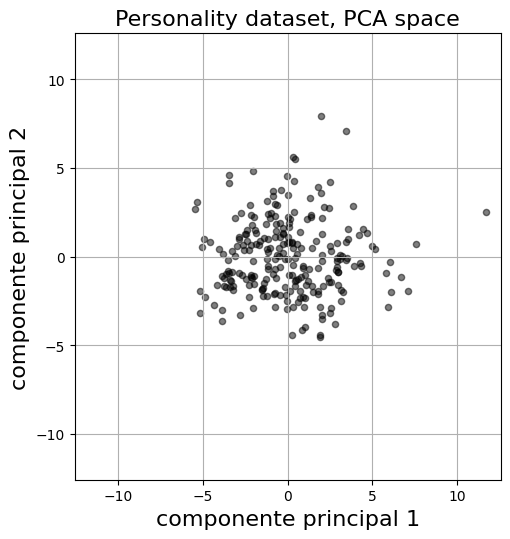

In [14]:
pc_x = 0
pc_y = 1

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

fig = plt.figure(figsize=(5,5))
plt.scatter(X_pca[:, pc_x], X_pca[:, pc_y],
            s = 20, c = 'k', marker = 'o',
            alpha = .5, cmap='RdYlGn')

plt.grid(); plt.tight_layout()
plt.title('Personality dataset, PCA space', fontsize=16)
plt.xlabel(pcs_names[pc_x], fontsize=16)
plt.ylabel(pcs_names[pc_y], fontsize=16)
lim = np.abs(plt.axis()).max()
plt.axis([-lim, lim, -lim, lim]);

In [15]:
def PCA_plot(X_std, attribute_names,
             pca, pcs_names,
             ax, pc_x=0, pc_y=1, escala_flechas=1):
    X_pca = pca.transform(X_std)

    plt.scatter(X_pca[:, pc_x], X_pca[:, pc_y],
                s = 20, c = 'k', marker = 'o',
                alpha = .5, cmap='RdYlGn')

    factor = escala_flechas*8*np.sqrt(np.max(np.cov(X_std,rowvar=False)))
    aux = np.eye(len(attribute_names))
    attributes_PCA = pca.transform(aux)
    for a,name in zip(attributes_PCA,attribute_names):
        ax.arrow(0, 0, a[pc_x]*factor, a[pc_y]*factor,
                 head_width=1/4*0.05*factor*1.5/escala_flechas,
                 head_length=1/4*0.1*factor*1.5/escala_flechas,
                 fc='k', ec='k')
        plt.text(a[pc_x]*factor, a[pc_y]*factor, name, color='r')

    plt.grid(); plt.tight_layout()
    plt.xlabel(pcs_names[pc_x], fontsize=16)
    plt.ylabel(pcs_names[pc_y], fontsize=16)

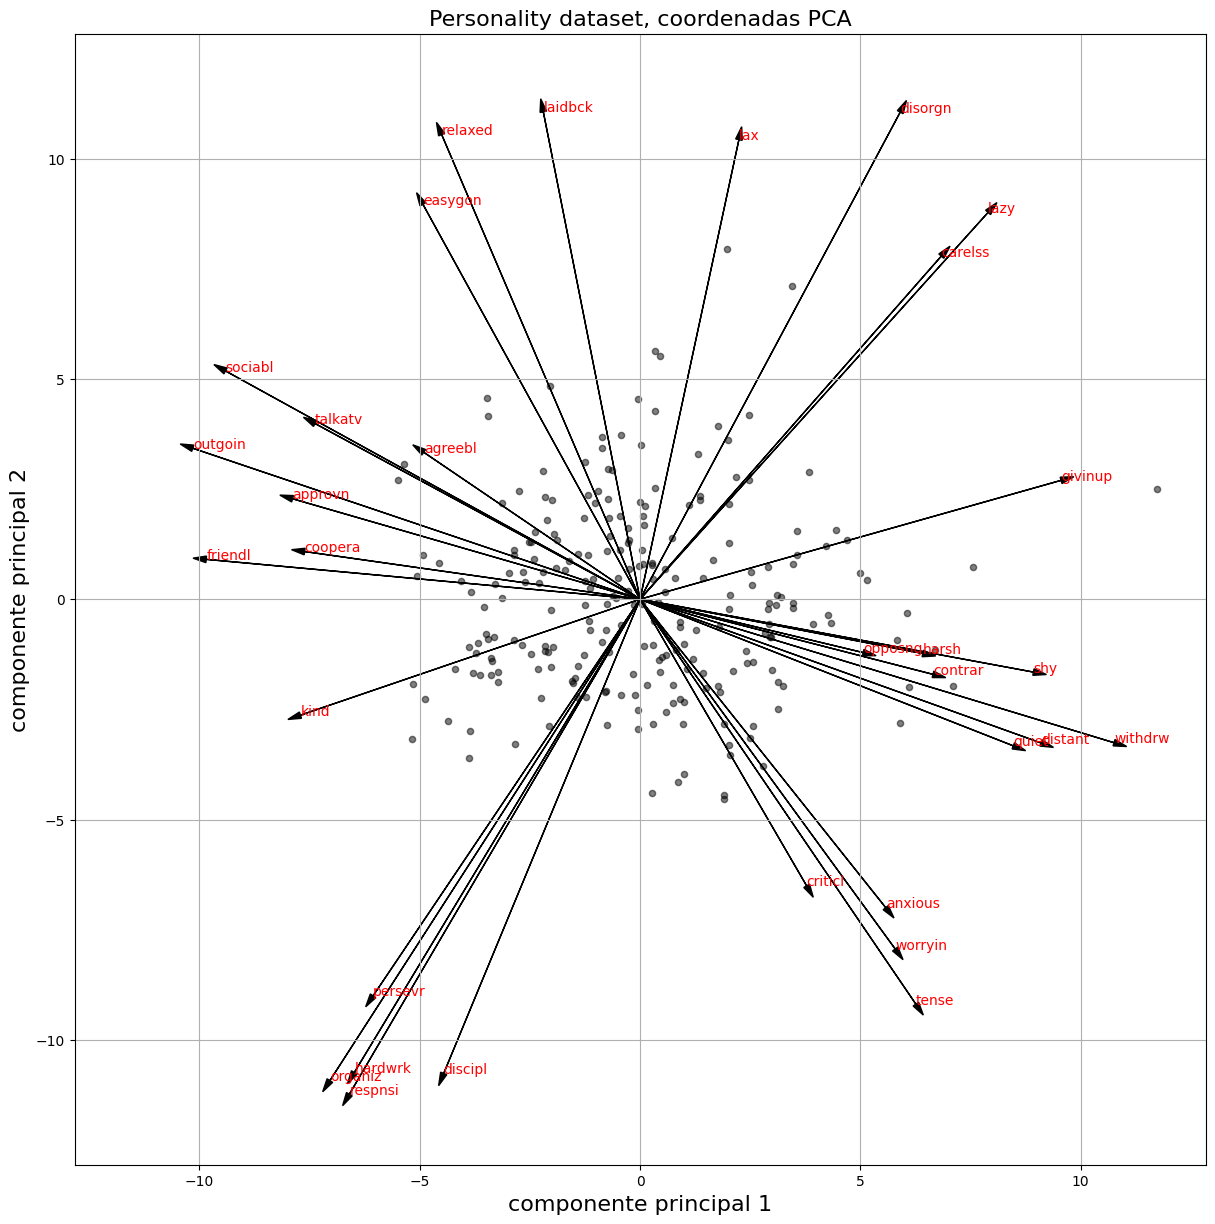

In [16]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(1,1,1)
PCA_plot(X_std, attribute_names,
         pca, pcs_names, ax, pc_x=0, pc_y=1, escala_flechas=5)
plt.title('Personality dataset, coordenadas PCA', fontsize=16)
lim = np.abs(plt.axis()).max()
plt.axis([-lim, lim, -lim, lim])
ax.set_aspect('equal');

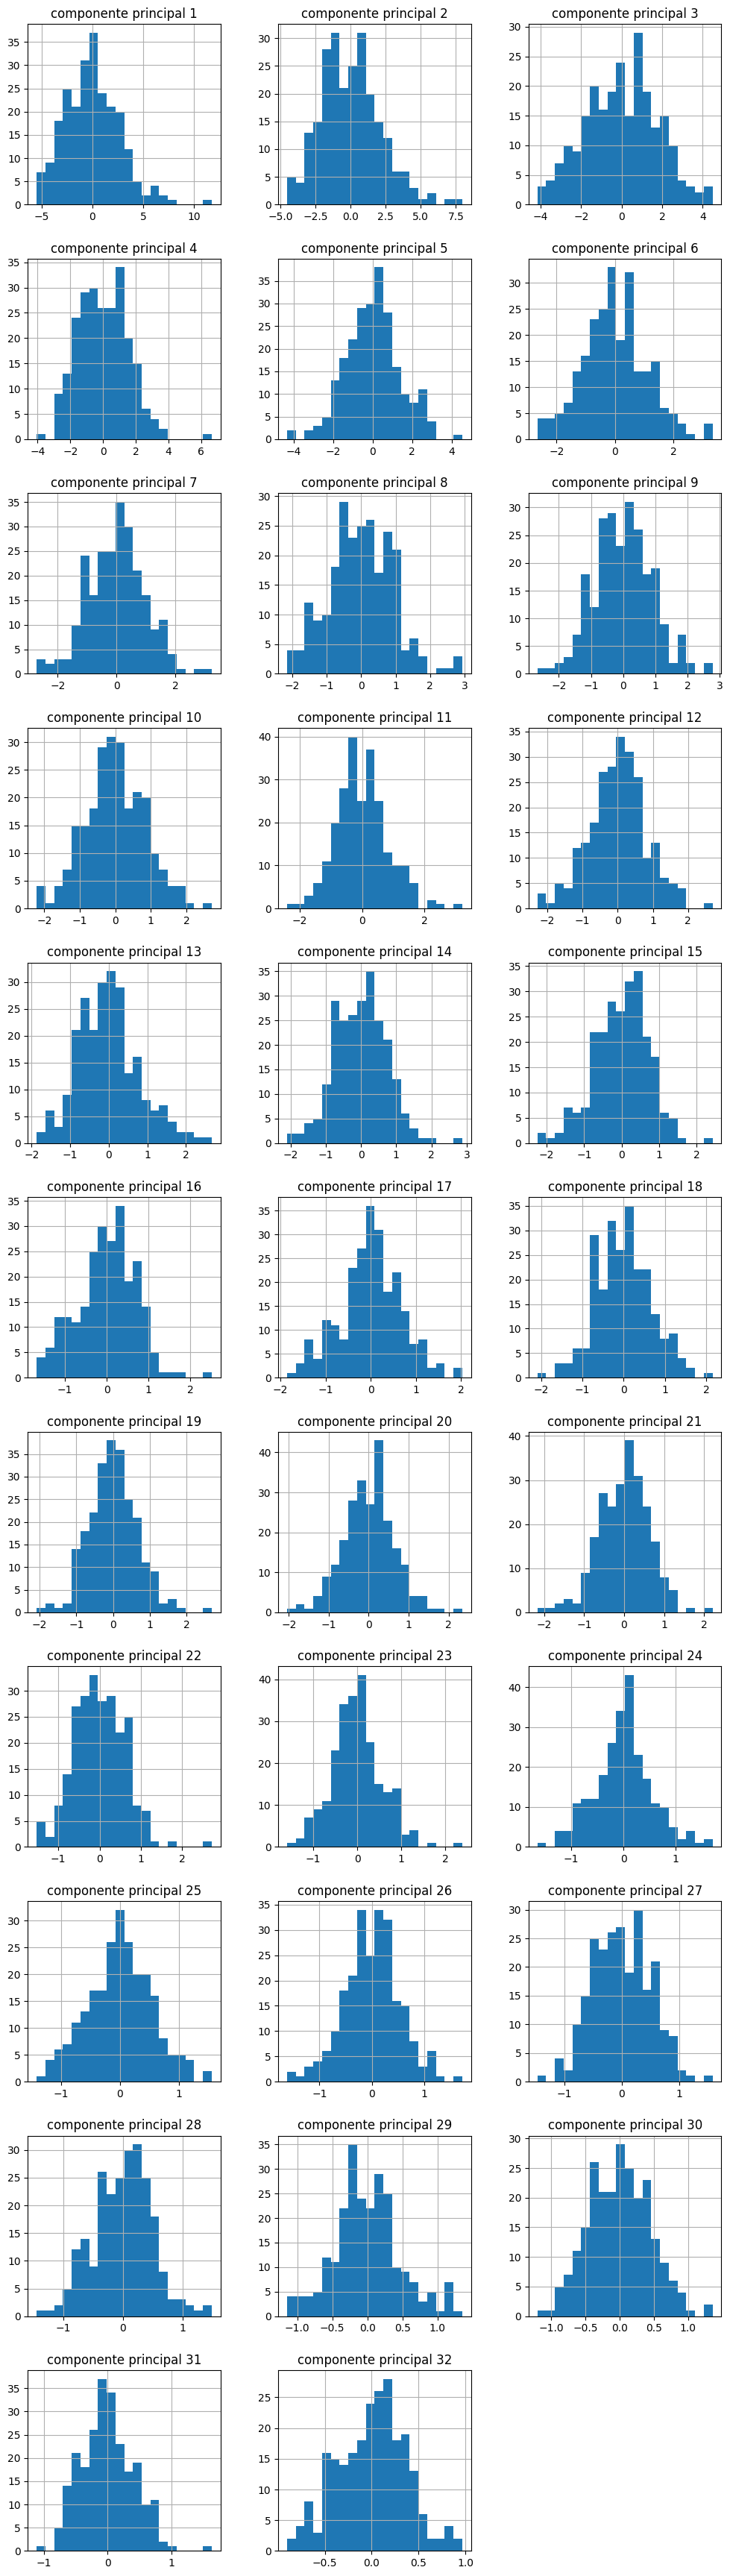

In [17]:
pd.DataFrame(X_pca, columns=pcs_names).hist(bins=20, figsize=(12,44), layout=(11,3));

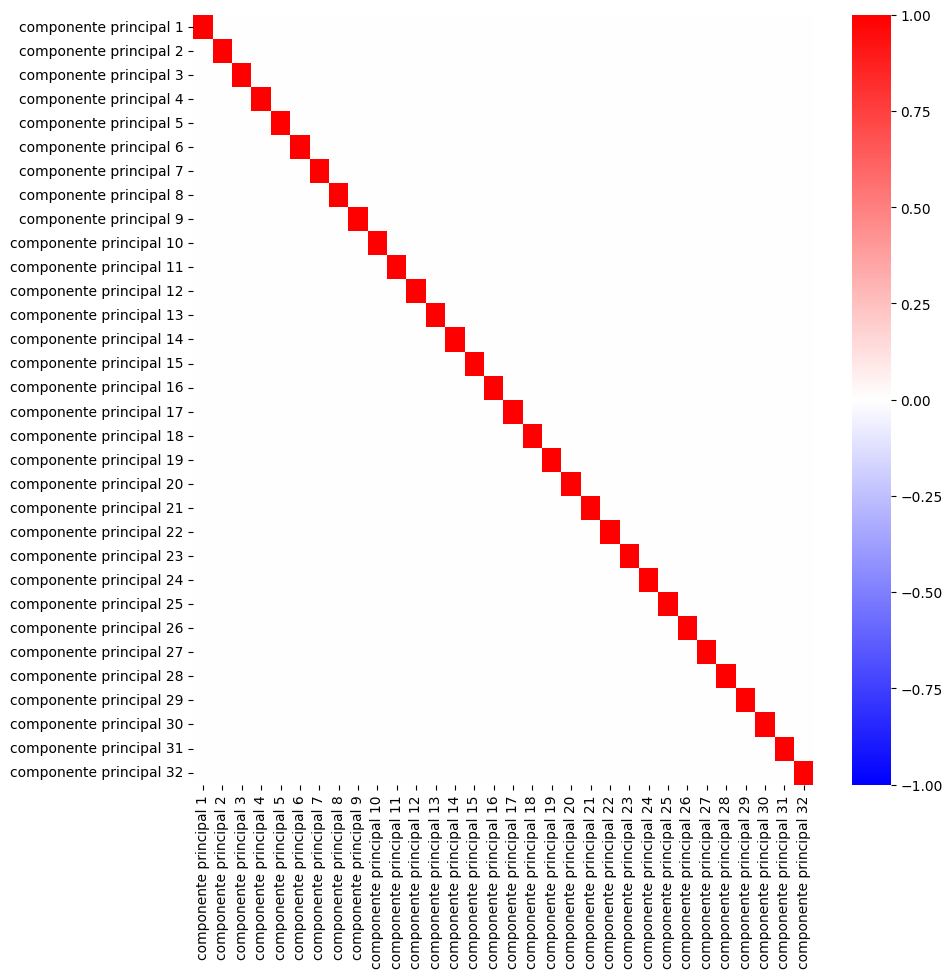

In [18]:
plt.figure(figsize=(10,10))
df_pca = pd.DataFrame(X_pca, columns=pcs_names)
sns.heatmap(df_pca.corr(), cmap="bwr", vmin=-1, vmax=1);